In [15]:
from Bio import SeqIO
import pandas as pd
from tqdm.notebook import tqdm

def extract_sequence(file_path, target_sequence):
    records = list(SeqIO.parse(file_path, "fastq"))
    count_dict = {}
    for record in tqdm(records):
        sequence = str(record.seq)
        index = sequence.find(target_sequence)
        if index != -1 and index >= 40:
            preceding_sequence = sequence[index-40:index]
            if preceding_sequence not in count_dict:
                count_dict[preceding_sequence] = 1
            else:
                count_dict[preceding_sequence] += 1

    return pd.DataFrame.from_records([count_dict])

# Call the function with your fastq file path
df = extract_sequence("/lab/weissman_imaging/Ultima/20240620-ExpansionFlex/240623_M01799_0541_000000000-DP8YF/Alignment_4/20240624_120102/Fastq/0620ExMFlex_S1_L001_R1_001.fastq", 
                      "ATCTGATAGCATAA")
print(len(df))

  0%|          | 0/1416069 [00:00<?, ?it/s]

1


In [18]:
np.unique(df.values, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  53,
         54,  55,  56,  57,  58,  60,  62,  63,  66,  67,  70,  74,  77,
         78,  80,  86,  88,  96, 119, 226]),
 array([117463,  10511,   8347,   8639,   9178,   8724,   8308,   7374,
          6586,   5747,   4989,   4295,   3649,   3257,   2697,   2306,
          1971,   1805,   1606,   1475,   1430,   1346,   1232,   1109,
          1025,    886,    795,    657,    526,    459,    419,    275,
           244,    189,    147,    124,     79,     63,     44,     37,
            34,     24,     30,      9,     15,     15,      6,      5,
             2,      3,      5,      2,      3,      2,      4,      2,
             1,      1,      1,      1,      1,      1,      1,      1,
             1

(array([0.00000e+00, 1.17463e+05, 1.05110e+04, 8.34700e+03, 8.63900e+03,
        9.17800e+03, 8.72400e+03, 8.30800e+03, 7.37400e+03, 6.58600e+03,
        5.74700e+03, 4.98900e+03, 4.29500e+03, 3.64900e+03, 3.25700e+03,
        2.69700e+03, 2.30600e+03, 1.97100e+03, 1.80500e+03, 1.60600e+03,
        1.47500e+03, 1.43000e+03, 1.34600e+03, 1.23200e+03, 1.10900e+03,
        1.02500e+03, 8.86000e+02, 7.95000e+02, 6.57000e+02, 5.26000e+02,
        4.59000e+02, 4.19000e+02, 2.75000e+02, 2.44000e+02, 1.89000e+02,
        1.47000e+02, 1.24000e+02, 7.90000e+01, 6.30000e+01, 4.40000e+01,
        3.70000e+01, 3.40000e+01, 2.40000e+01, 3.00000e+01, 9.00000e+00,
        1.50000e+01, 1.50000e+01, 6.00000e+00, 5.00000e+00, 2.00000e+00,
        3.00000e+00, 5.00000e+00, 0.00000e+00, 2.00000e+00, 3.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00

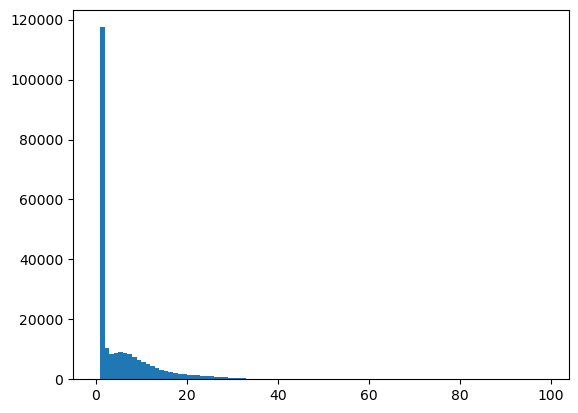

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df.values.flatten(), bins=np.arange(100))